In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

首先要处理红利的csv

'JD_div','GSK_div'

In [18]:
test_lst = ['AHT_div','AV_div','BA_div','GSK_div','HSBA_div','JD_div','NG_div','RDSB_div','RIO_div',
            'SPX_div','TSCO_div','TW_div','ULVR_div']

In [19]:
def get_years(lst, start_int, end_int):
    df = pd.read_excel('/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/dividend/{}.xlsx'.format(lst[0]), skiprows=1)
    df.columns = [''.join(filter(str.isalpha, i)).lower() for i in df.columns]
    df = [int(i[3:]) for i in list(df['yearend'])]
    df = list(filter(lambda i: end_int>=i>=start_int, df))
    return(df)

In [20]:
def get_dividends(lst, start_int, end_int):
    new_list = []
    for i in lst:
        df = pd.read_excel('/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/dividend/{}.xlsx'.format(i), skiprows=1)
        df.columns = [''.join(filter(str.isalpha, i)).lower() for i in df.columns]  #由于有些标题带*号，只保留字符，然后都变小写
        df = df[['yearend','total']]
        df.columns = ['year',i]
        df['year'] = [int(i[3:]) for i in list(df['year'])]
        df = df.loc[(df['year']<=end_int) & (df['year']>=start_int)] 
        df[i] = [float(re.sub("[^\d\.]", "", i)) for i in df[i]] 
        new_list.append(df[i].reset_index(drop=True))
    return(new_list)

In [33]:
div_yrs = get_years(test_lst, 2015, 2020)

In [34]:
dividends = get_dividends(test_lst, 2015, 2020)

In [35]:
df = pd.DataFrame(np.array(dividends).T, columns=test_lst , index=np.array(div_yrs).T)
df = df.iloc[::-1] #将数据从老到新排列
df

,AHT_div,AV_div,BA_div,GSK_div,HSBA_div,JD_div,NG_div,RDSB_div,RIO_div,SPX_div,TSCO_div,TW_div,ULVR_div
2015,15.25,20.8,20.9,80.0,51.0,1.41,42.87,188.0,215.0,69.0,1.16,1.67,120.80
2016,22.50,23.3,21.3,80.0,51.0,1.48,43.34,188.0,170.0,76.0,0.00,2.82,128.04
2017,27.50,27.4,21.8,80.0,51.0,1.55,44.27,188.0,290.0,87.5,0.00,4.74,143.40
2018,33.00,30.0,22.2,80.0,51.0,1.63,45.93,188.0,307.0,100.0,3.00,6.24,154.88
2019,40.00,15.5,23.2,80.0,30.0,1.71,47.34,188.0,382.0,110.0,5.77,3.84,164.16
2020,40.65,21.0,23.7,80.0,15.0,0.28,48.57,65.3,464.0,118.0,9.15,4.14,165.80


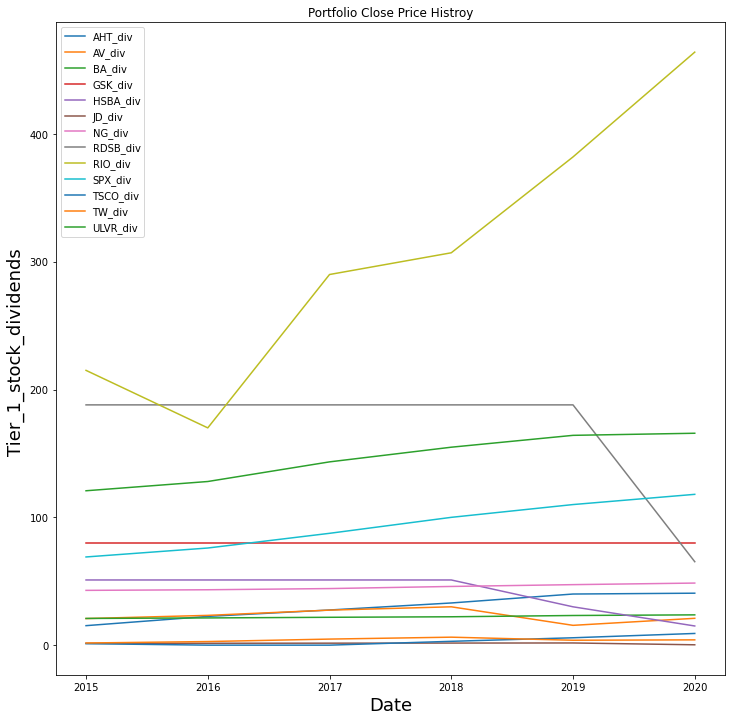

In [36]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = df

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stock_dividends ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()